<h1>Robotic Project - Card Dealing Robot </h1>

<h2>Hand Gesture Recognition</h2>

<h2>Using Mediapipe</h2>

In [12]:
import cv2 
import mediapipe as mp
import math
import numpy as np
import matplotlib.pyplot as plt 

mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1) 
mp_drawing = mp.solutions.drawing_utils #used for visualising our drawings

def coordinate(id, h, w):
    cx, cy = lm.x*w, lm.y*h
    cv2.circle(img, (int(cx), int(cy)), 1, (255,255,255), cv2.FILLED)  
    return cx, cy

def distance(cx1,cy1,cx2,cy2):
    return math.sqrt(((cx2-cx1)**2) + ((cy2-cy1)**2))

def calculate_angle(a,b,c): #calculate angle given 3 connected joints
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0]) #angle from endpoint to midpoint subtracted wiht angle from midpoint to firstpoint 
    angle = np.abs(radians*180.0/np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

<h2>Mediapipe Hands Module</h2>

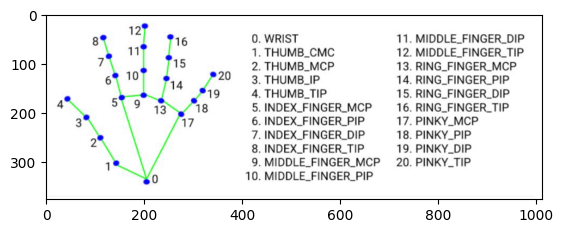

: 

In [14]:
img = cv2.imread("mediapipehands.jpg")
plt.imshow(img)

<h3>Detect Hands


In [ ]:
cap = cv2.VideoCapture(0) # Replace with your own video and webcam

while True:
    success, img = cap.read()
    
    if not success: 
        break
    
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)

    h, w, c = img.shape
    peace_sign = 0
    thumbs_up = 0
    
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            for id, lm in enumerate(handLms.landmark):
                if id == 0: 
                    __, cy_0 = coordinate(0, h, w)
                if id == 10: 
                    __, cy_10 = coordinate(10, h, w)
            
                if id == 2:
                    __, cy_2 = coordinate(2, h, w)
                if id == 3:
                    __, cy_3 = coordinate(3, h, w)
                if id == 1:
                    cx_1, cy_1 = coordinate(1, h, w)
                if id == 4:
                    cx_4, cy_4 = coordinate(4, h, w)
            
                if id == 5: 
                    cx_5, cy_5 = coordinate(5, h, w)
                if id == 9: 
                    __, cy_9 = coordinate(9, h, w)
                if id == 13: 
                    __, cy_13 = coordinate(13, h, w)
                if id == 17: 
                    cx_17, cy_17 = coordinate(17, h, w)
                    
                if id == 8: 
                    __, cy_8 = coordinate(8, h, w)  
                if id == 12: 
                    __, cy_12 = coordinate(12, h, w)
                if id == 16: 
                    __, cy_16 = coordinate(16, h, w)
                if id == 20: 
                    __, cy_20 = coordinate(20, h, w)

                if id == 6:
                    cx_6, cy_6 = coordinate(6, h, w)
                    

# and (0.4*distance(cx_4,cy_4,cx_1,cy_1)< distance(cx_5,cy_5,cx_17,cy_17))
            # if (cy_2 > cy_10 and cy_2 < cy_0) and (cy_3 > cy_10 and cy_3 < cy_0) and \
            #     (0.4*distance(cx_4,cy_4,cx_1,cy_1)< distance(cx_5,cy_5,cx_17,cy_17)) and ():
            #     thumbs_up=0
            # else:
            #     thumbs_up=1
            
            print(cx_6, cy_6, cx_4, cy_4)
            if cx_6 > cx_4 and cy_6 > cy_4:
                # if distance(cx_4, cy_4, cx_1, cy_1) * scale > 
            
            if (cy_5 > cy_8 and cy_9 > cy_12) and (cy_13 < cy_16 and cy_17 < cy_20):
                peace_sign = 1
            else:
                peace_sign = 0

    #render detections
    # mp_drawing.draw_landmarks(img,handLms, mpHands.HAND_CONNECTIONS,
    #         mp_drawing.DrawingSpec(color = (245,117,66), thickness = 2, circle_radius = 2),
    #         mp_drawing.DrawingSpec(color = (245,66,230), thickness = 2, circle_radius = 2)) 

    if thumbs_up == 1:
        cv2.putText(img,"THUMBS UP",(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1,cv2.LINE_AA)

    if peace_sign == 1:
        cv2.putText(img,"PEACE SIGN",(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1,cv2.LINE_AA)

    cv2.imshow("Image", img)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break  
        
cap.release()
cv2.destroyAllWindows()

272.53108978271484 359.61459159851074 280.0444984436035 466.3554382324219
275.43481826782227 335.7762336730957 253.89461517333984 397.97962188720703
275.28759002685547 332.7949047088623 255.10568618774414 389.9326515197754
276.18568420410156 335.0255012512207 254.2404556274414 389.851713180542
275.5563163757324 333.1435775756836 253.06669235229492 385.187931060791
274.56811904907227 329.2833423614502 248.5285758972168 380.23736000061035
269.7949981689453 322.80335426330566 249.72389221191406 377.4341869354248
269.6260643005371 321.1691951751709 251.13103866577148 378.1061840057373
269.1201591491699 321.00677490234375 250.8173942565918 377.47066497802734
269.4222831726074 320.5645751953125 249.55883026123047 376.64929389953613
269.2812728881836 320.39268493652344 251.57730102539062 376.7629051208496
270.07686614990234 320.9057807922363 253.42626571655273 376.7317771911621
273.3926200866699 321.27920150756836 254.8691749572754 377.4492645263672
274.76531982421875 320.7027053833008 256.31

<h2>Connect to Arduino Board </h2>

In [ ]:
import serial
import time

serialcomm = serial.Serial('COM5', 9600)
serialcomm.timeout = 1

while True:
    i = input("Enter Input: ").strip()
    if i == "Done":
        print('finished')
        break

    serialcomm.write(i.encode())
    time.sleep(0.5)
    print(serialcomm.readline().decode('ascii'))

serialcomm.close()

Led on
Led off
invald input
finished
